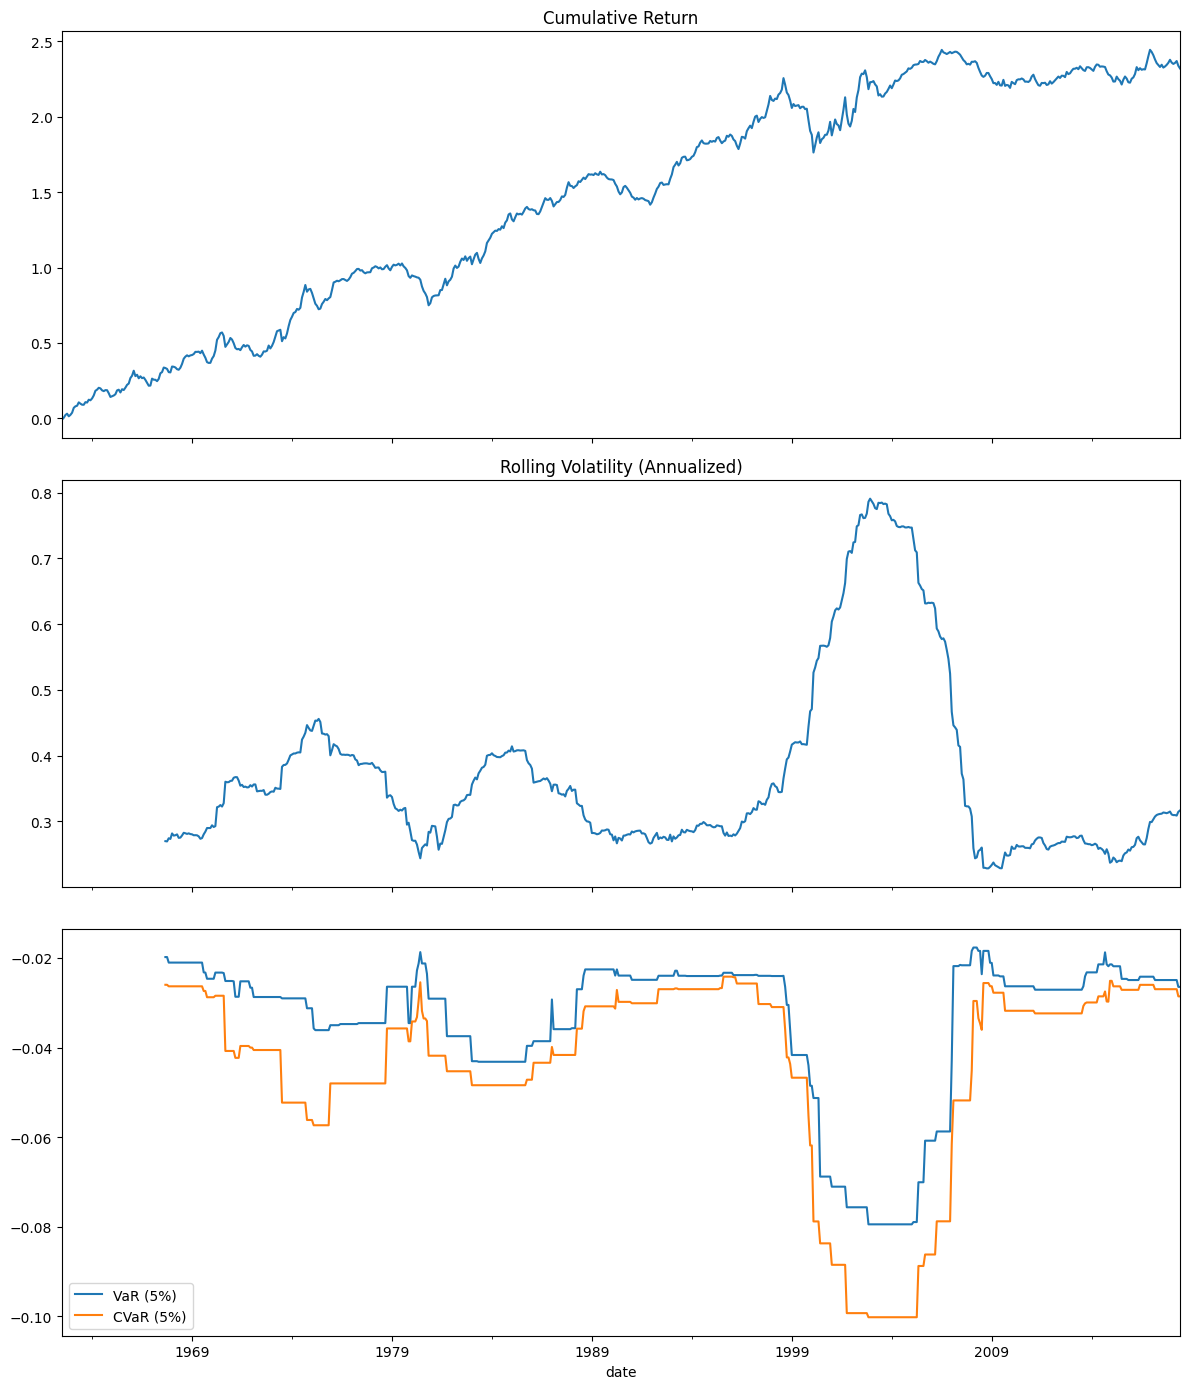

Static Risk Summary:
Annualized Volatility: 38.66%
Value at Risk (5%): -3.14%
Conditional VaR (5%): -5.38%
Sharpe Ratio: 2.25
Maximum Drawdown: -40.07%


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


return_dataframe = pd.read_pickle("Data/hml_df.pkl")
returns = return_dataframe['hml_return']
returns.squeeze()

# Define rolling window size
window = 63  # ~3 months of trading days

# Function to compute drawdowns
def compute_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown

# Compute rolling metrics
volatility = returns.rolling(window).std() * np.sqrt(252)
rolling_var = returns.rolling(window).apply(lambda x: np.percentile(x, 5), raw=True)
rolling_cvar = returns.rolling(window).apply(lambda x: x[x <= np.percentile(x, 5)].mean(), raw=True)

# Max drawdown (non-rolling)
drawdown = compute_drawdown(returns)
max_drawdown = drawdown.min()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 14), sharex=True)
returns.cumsum().plot(ax=axs[0], title="Cumulative Return")
volatility.plot(ax=axs[1], title="Rolling Volatility (Annualized)")
rolling_var.plot(ax=axs[2], label="VaR (5%)")
rolling_cvar.plot(ax=axs[2], label="CVaR (5%)")
axs[2].legend()

plt.tight_layout()
plt.show()

# Print static risk summary
print("Static Risk Summary:")
print(f"Annualized Volatility: {returns.std() * np.sqrt(252):.2%}")
print(f"Value at Risk (5%): {np.percentile(returns, 5):.2%}")
print(f"Conditional VaR (5%): {returns[returns <= np.percentile(returns, 5)].mean():.2%}")
print(f"Sharpe Ratio: {returns.mean() / returns.std() * np.sqrt(252):.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
